In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

df = pd.read_csv("C:\\Users\\Divya\\Downloads\\COVID clinical trials.csv")  
df.head(7)


,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924
5,6,NCT04516954,Convalescent Plasma for COVID-19 Patients,CPCP,Enrolling by invitation,No Results Available,COVID 19,Biological: Convalescent COVID 19 Plasma,Evaluate the safety|Change in requirement for ...,Vinmec Research Institute of Stem Cell and Gen...,...,ISC.20.11.1,"August 1, 2020","November 30, 2020","December 30, 2020","August 18, 2020",NaN,"August 20, 2020",Vinmec Research Institute of Stem cell and Gen...,NaN,https://ClinicalTrials.gov/show/NCT04516954
6,7,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,COVID-BF,Not yet recruiting,No Results Available,Covid19|Exclusive Breastfeeding,Behavioral: COVID-19 Breastfeeding Support,COVID-19 breastfeeding guidance adherence at b...,Meharry Medical College,...,330875,September 2020,October 2021,June 2022,"July 20, 2020",NaN,"July 20, 2020","Meharry Medical College, Nashville, Tennessee,...",NaN,https://ClinicalTrials.gov/show/NCT04476940


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [7]:
df.isnull().sum().sort_values(ascending=False).head(20)


Results First Posted       5747
Study Documents            5601
Acronym                    3303
Phases                     2461
Interventions               886
Locations                   585
Primary Completion Date      36
Completion Date              36
Study Designs                35
Outcome Measures             35
Start Date                   34
Enrollment                   34
Gender                       10
Other IDs                     1
Study Results                 0
NCT Number                    0
Rank                          0
Title                         0
Conditions                    0
Sponsor/Collaborators         0
dtype: int64

In [8]:
print("Total trials:", len(df))
print("Unique sponsors:", df['Sponsor/Collaborators'].nunique())
print("Unique conditions:", df['Conditions'].nunique())


Total trials: 5783
Unique sponsors: 3631
Unique conditions: 3067


In [13]:
date_cols = ['Start Date','Primary Completion Date','Completion Date','First Posted','Results First Posted','Last Update Posted']
for c in date_cols:
    if c in df.columns:
        df[c+'_dt'] = pd.to_datetime(df[c], dayfirst=True, errors='coerce')
df[[c for c in df.columns if c.endswith('_dt')]].head(5)


,Start Date_dt,Primary Completion Date_dt,Completion Date_dt,First Posted_dt,Results First Posted_dt,Last Update Posted_dt
0,2020-11-09,2020-12-22,2021-04-30,2021-03-08,NaT,2021-03-08
1,2020-11-02,2020-12-15,2021-01-29,2020-10-20,NaT,2020-10-20
2,2020-05-07,2021-06-15,2021-06-15,2020-05-20,NaT,2020-11-09
3,2020-05-25,2020-07-31,2020-08-31,2020-06-04,NaT,2020-06-04
4,2020-05-05,NaT,NaT,2020-05-20,NaT,2020-06-04


In [15]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Rank,5783.0,2892.0,1.0,1446.5,2892.0,4337.5,5783.0,1669.552635
Enrollment,5749.0,18319.488607,0.0,60.0,170.0,560.0,20000000.0,404543.728784
Start Date_dt,5263,2020-07-07 06:53:58.153144576,1998-01-01 00:00:00,2020-04-20 00:00:00,2020-06-22 00:00:00,2020-11-01 00:00:00,2021-12-01 00:00:00,NaN
Primary Completion Date_dt,4321,2021-05-12 23:25:40.476741632,2016-05-31 00:00:00,2020-09-21 00:00:00,2021-03-01 00:00:00,2021-08-21 00:00:00,2099-12-31 00:00:00,NaN
Completion Date_dt,4258,2021-08-13 10:35:47.487083264,2018-05-25 00:00:00,2020-11-04 00:00:00,2021-04-30 00:00:00,2021-12-31 00:00:00,2099-12-31 00:00:00,NaN
First Posted_dt,5783,2020-07-30 19:18:37.413107456,2007-12-12 00:00:00,2020-05-07 00:00:00,2020-07-20 00:00:00,2020-12-01 00:00:00,2021-04-14 00:00:00,NaN
Results First Posted_dt,36,2020-11-02 02:40:00,2019-04-08 00:00:00,2020-09-11 18:00:00,2020-11-24 12:00:00,2021-02-04 18:00:00,2021-04-14 00:00:00,NaN
Last Update Posted_dt,5783,2020-11-17 03:36:38.097873152,2020-02-05 00:00:00,2020-08-11 00:00:00,2020-12-14 00:00:00,2021-02-26 00:00:00,2021-04-14 00:00:00,NaN


In [17]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Rank,5783.0,2892.000000,1669.552635,1.0,1446.5,2892.0,4337.5,5783.0
Enrollment,5749.0,18319.488607,404543.728784,0.0,60.0,170.0,560.0,20000000.0


In [19]:
print(list(df.columns))

['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results', 'Conditions', 'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment', 'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Results First Posted', 'Last Update Posted', 'Locations', 'Study Documents', 'URL', 'Start Date_dt', 'Primary Completion Date_dt', 'Completion Date_dt', 'First Posted_dt', 'Results First Posted_dt', 'Last Update Posted_dt']


In [24]:
phase_col = 'Phases' if 'Phases' in df.columns else 'Phase' if 'Phase' in df.columns else None
status_col = 'Status' if 'Status' in df.columns else None

if phase_col:
    print("Phase counts:")
    display(df[phase_col].value_counts())
else:
    print("Phase column not found; check df.columns")

if status_col:
    print("\nStatus counts:")
    display(df[status_col].value_counts())
else:
    print("Status column not found; check df.columns")


Phase counts:


Phases
Not Applicable     1354
Phase 2             685
Phase 3             450
Phase 1             234
Phase 2|Phase 3     200
Phase 1|Phase 2     192
Phase 4             161
Early Phase 1        46
Name: count, dtype: int64


Status counts:


Status
Recruiting                   2805
Completed                    1025
Not yet recruiting           1004
Active, not recruiting        526
Enrolling by invitation       181
Withdrawn                     107
Terminated                     74
Suspended                      27
Available                      19
No longer available            12
Approved for marketing          2
Temporarily not available       1
Name: count, dtype: int64

In [28]:
cond_col = 'Conditions' if 'Conditions' in df.columns else None
if cond_col:
    top_conditions = df[cond_col].value_counts().head(10)
    display(top_conditions)
else:
    print("Conditions column not found; check df.columns")


Conditions
COVID-19                  720
Covid19                   657
COVID                      95
Covid-19                   88
SARS-CoV-2                 52
Coronavirus Infection      51
Coronavirus                47
COVID 19                   46
COVID19                    45
Corona Virus Infection     38
Name: count, dtype: int64

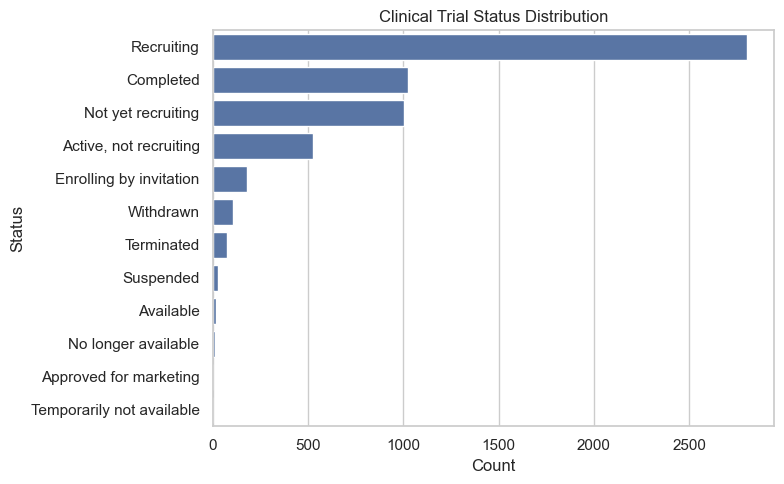

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(y=status_col, data=df, order=df[status_col].value_counts().index)
plt.title("Clinical Trial Status Distribution")
plt.xlabel("Count")
plt.ylabel("Status")
plt.tight_layout()
plt.savefig('ct_status.png', dpi=200)
plt.show()


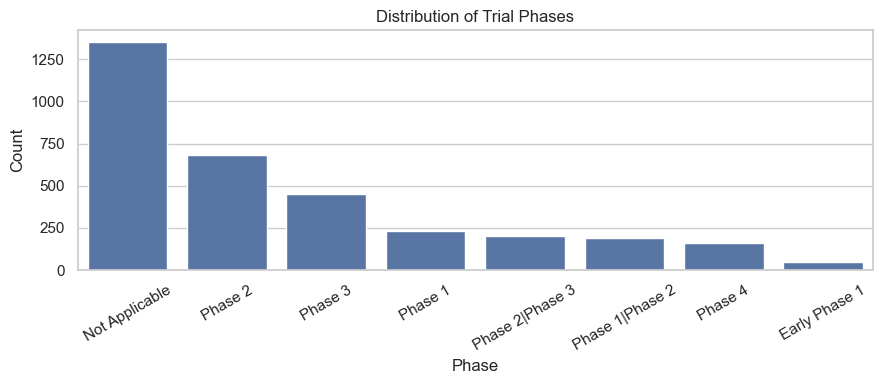

In [34]:
plt.figure(figsize=(9,4))
sns.countplot(x=phase_col, data=df, order=df[phase_col].value_counts().index)
plt.title("Distribution of Trial Phases")
plt.xlabel("Phase")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('ct_phases.png', dpi=200)
plt.show()


C:\Users\Divya\AppData\Local\Temp\ipykernel_10344\3801092922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='mako')


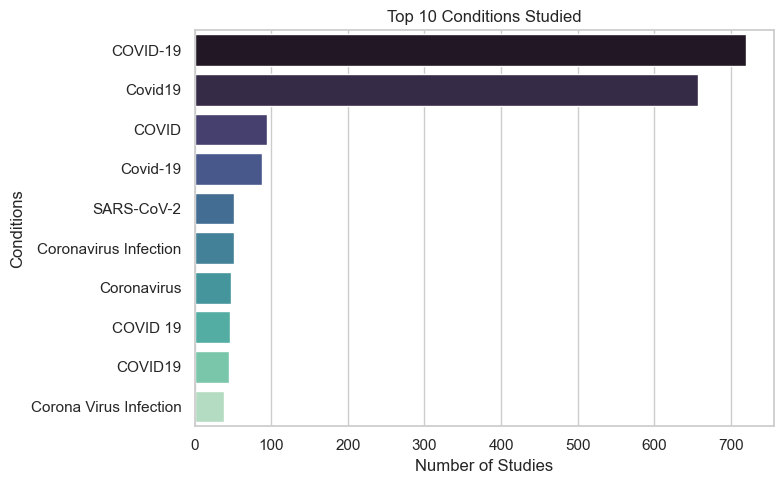

In [38]:
if cond_col:
    plt.figure(figsize=(8,5))
    sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='mako')
    plt.title("Top 10 Conditions Studied")
    plt.xlabel("Number of Studies")
    plt.tight_layout()
    plt.savefig('ct_conditions.png', dpi=200)
    plt.show()


C:\Users\Divya\AppData\Local\Temp\ipykernel_10344\2692740730.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sponsors.values, y=top_sponsors.index, palette='viridis')


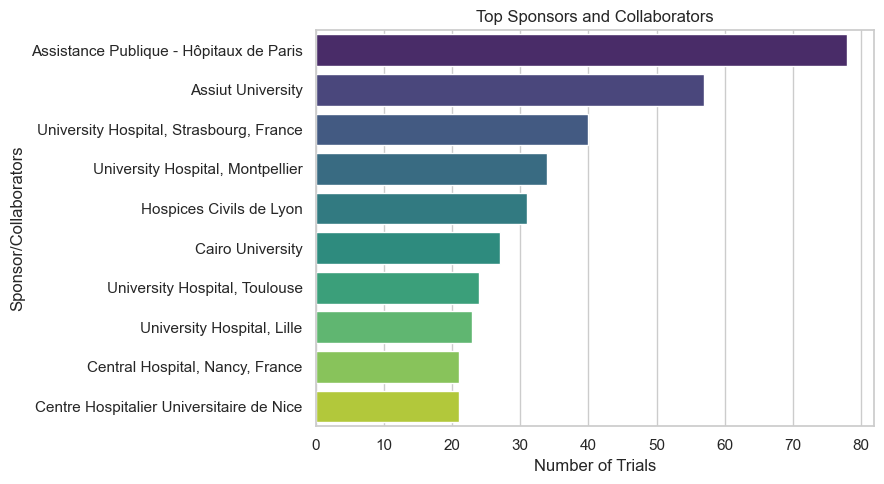

In [45]:
sponsor_col = 'Sponsor/Collaborators' if 'Sponsor/Collaborators' in df.columns else 'Sponsor' if 'Sponsor' in df.columns else None
if sponsor_col:
    top_sponsors = df[sponsor_col].value_counts().head(10)
    plt.figure(figsize=(9,5))
    sns.barplot(x=top_sponsors.values, y=top_sponsors.index, palette='viridis')
    plt.title("Top Sponsors and Collaborators")
    plt.xlabel("Number of Trials")
    plt.tight_layout()
    plt.savefig('ct_sponsors.png', dpi=200)
    plt.show()


In [50]:
cros = pd.crosstab(df[phase_col], df[status_col])
display(cros.head(20))
cros.to_csv('ct_phase_status_crosstab.csv')


Status,"Active, not recruiting",Completed,Enrolling by invitation,Not yet recruiting,Recruiting,Suspended,Terminated,Withdrawn
Phases,,,,,,,,
Early Phase 1,7,3,4,5,22,2,0,3
Not Applicable,111,226,54,282,647,2,13,19
Phase 1,44,38,1,42,98,0,4,7
Phase 1|Phase 2,26,17,3,46,92,2,2,4
Phase 2,81,78,10,114,343,4,25,30
Phase 2|Phase 3,15,20,1,46,102,4,6,6
Phase 3,59,56,6,89,196,9,15,20
Phase 4,8,22,6,30,81,2,5,7


In [53]:
df.to_csv('covid_clinical_trials_cleaned.csv', index=False)
print("Saved cleaned CSV and figures ct_*.png in current folder.")


Saved cleaned CSV and figures ct_*.png in current folder.
